Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 0.2580 - accuracy: 0.9223 - val_loss: 0.1355 - val_accuracy: 0.9619
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1036 - accuracy: 0.9693 - val_loss: 0.0977 - val_accuracy: 0.9708
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0702 - accuracy: 0.9789 - val_loss: 0.0796 - val_accuracy: 0.9784
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0541 - accuracy: 0.9840 - val_loss: 0.0971 - val_accuracy: 0.9715
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0463 - accuracy: 0.9864 - val_loss: 0.0736 - val_accuracy: 0.9784
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0887 - val_accuracy: 0.9768
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0325 - accuracy: 0.9904 - val_loss: 0.0980 - val_accuracy:

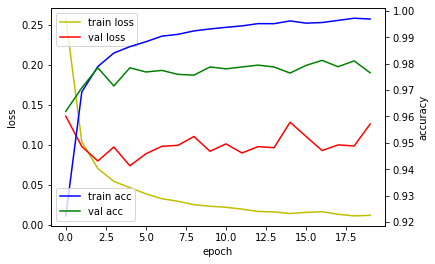

In [1]:
from datetime import datetime

from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import os

# CPU 사용으로 테스트하려면 주석 제거
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train, X_test = X_train/255.0, X_test/255.0

number_of_data = len(X_train)
train_count = 50000
val_count = 10000

X_val = X_train[number_of_data - val_count:]
Y_val = Y_train[number_of_data - val_count:]
X_train = X_train[:train_count]
Y_train = Y_train[:train_count]

# mnist dataset: width 28 x height 28

X_train = X_train.reshape(train_count, 784).astype('float32')
X_val = X_val.reshape(val_count, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

Y_train = utils.to_categorical(Y_train, 10)
Y_val = utils.to_categorical(Y_val, 10)
Y_test = utils.to_categorical(Y_test, 10)

model = Sequential()

model.add(Dense(units=512, input_dim=28*28, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

now = datetime.now()
hist = model.fit(X_train, Y_train, epochs=20, batch_size=50, validation_data=(X_val, Y_val))
print('elapsed: ', datetime.now() - now)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print('')
print('loss: ', str(loss_and_metrics[0]))
print('accuracy: ', str(loss_and_metrics[1]))

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()